# Covid19 - Folge 22 und 23

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [6]:
df = pd.read_csv('data/covid22-23.csv')
df.head(3)
# keys = ['Datum', 'Bundesland', 'Betten', 'Bettenart']
# for k in keys:
#     print(df[k].unique())

,Datum,Bundesland,Betten,Bettenart
0,2022-02-01,Baden-Württemberg,278,Intensivbett
1,2022-02-01,Baden-Württemberg,1140,Normalbett
2,2022-02-01,Bayern,346,Intensivbett


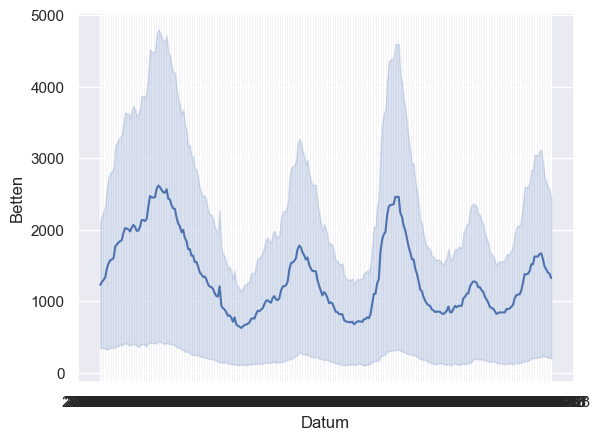

In [8]:
sns.lineplot(data=df[df['Bundesland']=='Bayern'], x='Datum', y='Betten')
plt.show()

In [10]:
# Template für Dash page
# Projekt Health Care Analysis
# AUTHOR Sven Schrodt
# SINCE 2025-07-15

import dash_mantine_components as dmc
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc
from dd import DataDictionary as dd

df = pd.read_csv('data/covid22-23.csv')
fig = px.line(df, x="Datum", y="Betten", color="Bundesland")
app = Dash()

app.layout = [
    html.H1(children="Grunddaten der Krankenhäuser", className="app-header",),
    html.Hr(),
    dash_table.DataTable(
        data=df.to_dict("records"),
        columns=[{"name": i, "id": i} for i in df.columns],
        page_size=3,
        style_header={"backgroundColor": "rgb(30, 30, 30)", "color": "white"},
        style_data={"backgroundColor": "rgb(50, 50, 50)", "color": "white"},
    ),
    #dcc.Checklist(options=dta, id='controls-and-check-item', value=['bett'], inline=True),
    dcc.Graph(figure=fig, id="controls-and-graph"),
    
]

@callback(
    Output(component_id="controls-and-graph", component_property="figure"),
    Input(component_id="controls-and-check-item", component_property="value"),
)
   


def update_graph(col_chosen):
    print(col_chosen)
    #foo = df[col_chosen]
    fig = px.line(df_s, x="jahr", y=col_chosen)
    return fig


if __name__ == "__main__":
    app.run(debug=False, port=4711)